## Preprocessing step and compressed saving for on github

Here is the python code, with which the original csv file has been processed and compressed. Because of size problems, I truncated the 3,933,621 observations down to 2,950,000 obersations to fulfill githubs 50 MB size constraint.


```{python}
input = pd.read_csv('usd.csv')
input = input.loc[0:2949999]
input['date'] =  pd.to_datetime(input['date'])
input['amount_btc'] = pd.Series(input['amount_usd'] / input['price_usd'], index=input.index)
input.to_csv('usd_adj.csv', sep = ',', compression = 'bz2')

testset = input.loc[0:9999,:].copy(deep=True)
testset.to_csv('testset.csv', sep = ',', compression = 'bz2')
```

Originally I truncated the data inside a texteditor. When I implemented the compressing procedure, I tested if how I can most effectively assign the truncated testdata to a new object, which was more complicated than expected. The size is of the file is huge compared to the actual content and the time it takes to load it, is equally huge. In the following some interesting statistics. <span style="color:red">**The problem has been solved viy the copy-function and avoiding errors in the xavin process.**</span>.

```{python}
import time
import sys
```
usd1.csv has a size of 325KB and contains 10,417 observations:

```{python}
start_time = time.clock()
test = pd.read_csv('usd1.csv')
print (time.clock() - start_time, "seconds")
print(sys.getsizeof(test), 'bits')

#0.02049917376103849 seconds
#958468 bits
```

testset.csv has a size of 152KB and contains 10,000 observations

```{python}
start_time = time.clock()
test = pd.read_csv('testset.csv', sep = ',', compression = 'bz2')
print (time.clock() - start_time, "seconds")
print(sys.getsizeof(test), 'bits')

#0.20917903891745482 seconds
#1080104 bits
```

## Loading Data and creating Environment

As described above, the testset is a dataset truncated to 10,000 observations of the original data. This aimes to assure computational speed for this testing environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
input = pd.read_csv('data/testset.csv', sep = ',', compression = 'bz2')

input = input.iloc[:, 1:]

input['date'] =  pd.to_datetime(input['date'])

## Show the dimensions and format of the data

In [10]:
print('The Dimensions of the Dataset are ' + str(input.shape) +'.')
print('The types of the variables are as follows:')
print(input.dtypes)

input.head()

The Dimensions of the Dataset are (10000, 4).
The types of the variables are as follows:
date          datetime64[ns]
price_usd            float64
amount_usd           float64
amount_btc           float64
dtype: object


,date,price_usd,amount_usd,amount_btc
0,2010-07-17 23:09:17,0.04951,20.00,403.958796
1,2010-07-18 03:43:06,0.05941,50.01,841.777479
2,2010-07-18 17:48:56,0.08080,5.00,61.881188
3,2010-07-18 21:44:11,0.08585,10.00,116.482236
4,2010-07-18 22:00:26,0.08584,5.00,58.247903


## Charts for the data

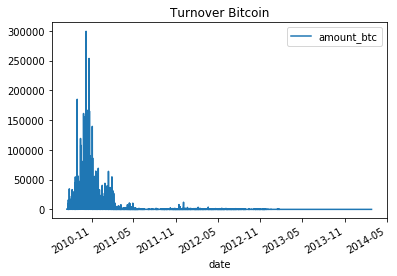

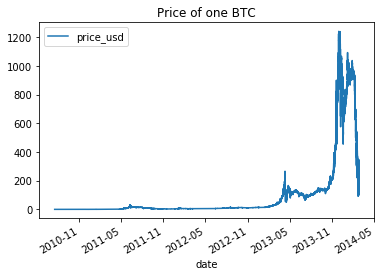

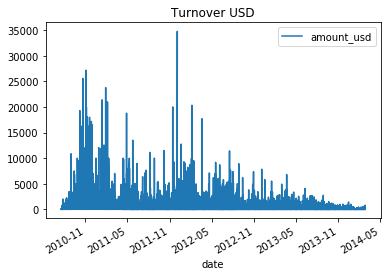

In [65]:
input.plot(x = 'date', y = 'amount_btc', title = 'Turnover Bitcoin')
input.plot(x = 'date', y = 'price_usd', title = 'Price of one BTC')
input.plot(x = 'date', y = 'amount_usd', title = 'Turnover USD')
plt.show()

## Here comes the first analysis

In [60]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [61]:
x = estimated_autocorrelation(np.array(input['price_usd']))
x

array([ 1.        ,  0.99902825,  0.99861389, ..., -1.04719769,
       -1.05646212, -1.02749463])

In [62]:
x.shape == np.array(input['price_usd']).shape

True